In [1]:
import pandas as pd
import numpy as np
import os
import sys
import time
import collections
import matplotlib.pyplot as plt


df= pd.read_csv('top100_rating.csv')
genres = np.load('top100artistgenres.npy').item()

# print('top 100 popular artist')
# print(df['artist'].unique())

uni_artist = list(df['artist'].unique())

In [2]:
artist_data = np.load('artist_dict .npy').item()
cus_data = np.load('customer_id_dict .npy').item()

In [3]:
cus_data['5b8bc839a6d8146f90f5c1b02df3ac6c']

defaultdict(None,
            {'Green Day': 0.2621359223300971,
             'James Blunt': 0.25728155339805825,
             'Linkin Park': 0.22330097087378642,
             'Nickelback': 0.06796116504854369,
             'Slipknot': 0.18932038834951456})

In [4]:
# artist_data['Linkin Park']
# dict((k, v) for k, v in artist_data['Linkin Park'].items() if v >= 0.2)

In [5]:
ip = 'Linkin Park'
target_cus = dict((k, v) for k, v in artist_data['Linkin Park'].items() if v >= 0.2).keys()

In [6]:
artist_temp_dict = collections.defaultdict()
for i in target_cus:
    for j in cus_data[i].keys():
        try:
            artist_temp_dict[j]+=cus_data[i][j]
        except:
            artist_temp_dict[j] = cus_data[i][j]

In [7]:
# artist_temp_dict

In [8]:
op = list(sorted(artist_temp_dict, key=artist_temp_dict.get, reverse=True))
op.remove(ip)

In [9]:
count = 0
# est = time_est(100)
total_atd = collections.defaultdict()
for ip in uni_artist:
#     ip = ip
    target_cus = dict((k, v) for k, v in artist_data[ip].items() if v >= 0.5).keys()
    artist_temp_dict = collections.defaultdict()
    for i in target_cus:
        for j in cus_data[i].keys():
            try:
                artist_temp_dict[j]+=cus_data[i][j]
            except:
                artist_temp_dict[j] = cus_data[i][j]
    total_atd[ip] = artist_temp_dict
#     est.check()

In [10]:
# est = time_est(100)
score_list = []
for num_pred in range(1,100):
    count = 0
    for ip in uni_artist:
        artist_temp_dict = total_atd[ip]
        op = list(sorted(artist_temp_dict, key=artist_temp_dict.get, reverse=True))
        op.remove(ip)
        related = op[:num_pred]
        ip_gen = genres[ip]
        for j in related:
            for i in genres[j]:
                if i in ip_gen:
                    count+=1
                    break
    score_list.append(count/(100*num_pred))
#     est.check()

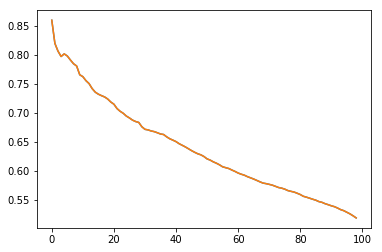

In [12]:
plt.plot(score_list)
plt.show()

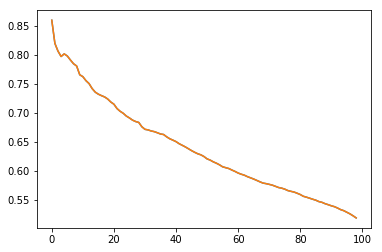

In [30]:
count = 0
# est = time_est(100)
total_atd = collections.defaultdict()
for ip in uni_artist:
#     ip = ip
    target_cus = dict((k, v) for k, v in artist_data[ip].items() if v >= 0.5).keys()
    artist_temp_dict = collections.defaultdict()
    for i in target_cus:
        for j in cus_data[i].keys():
            try:
                artist_temp_dict[j]+=cus_data[i][j]
            except:
                artist_temp_dict[j] = cus_data[i][j]
    total_atd[ip] = artist_temp_dict
#     est.check()
# est = time_est(100)
score_list = []
for num_pred in range(1,100):
    count = 0
    for ip in uni_artist:
        artist_temp_dict = total_atd[ip]
        op = list(sorted(artist_temp_dict, key=artist_temp_dict.get, reverse=True))
        op.remove(ip)
        related = op[:num_pred]
        ip_gen = genres[ip]
        for j in related:
            for i in genres[j]:
                if i in ip_gen:
                    count+=1
                    break
    score_list.append(count/(100*num_pred))
#     est.check()
plt.plot(score_list)
plt.show()

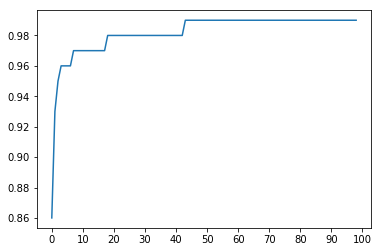

In [33]:
score_list = []

for num_pred in range(1,100):
    count = 0
    for ip in uni_artist:
        artist_temp_dict = total_atd[ip]
        op = list(sorted(artist_temp_dict, key=artist_temp_dict.get, reverse=True))
        op.remove(ip)
        related = op[:num_pred]
        ip_gen = genres[ip]
        correct = 0
        for j in related:
            for i in genres[j]:
                if i in ip_gen:
                    correct = 1
        count += correct
    score_list.append(count/(100))
plt.xticks(np.arange(0, 101, 10))
plt.plot(score_list)
plt.show()

In [34]:
np.save('count_acc.npy', score_list)

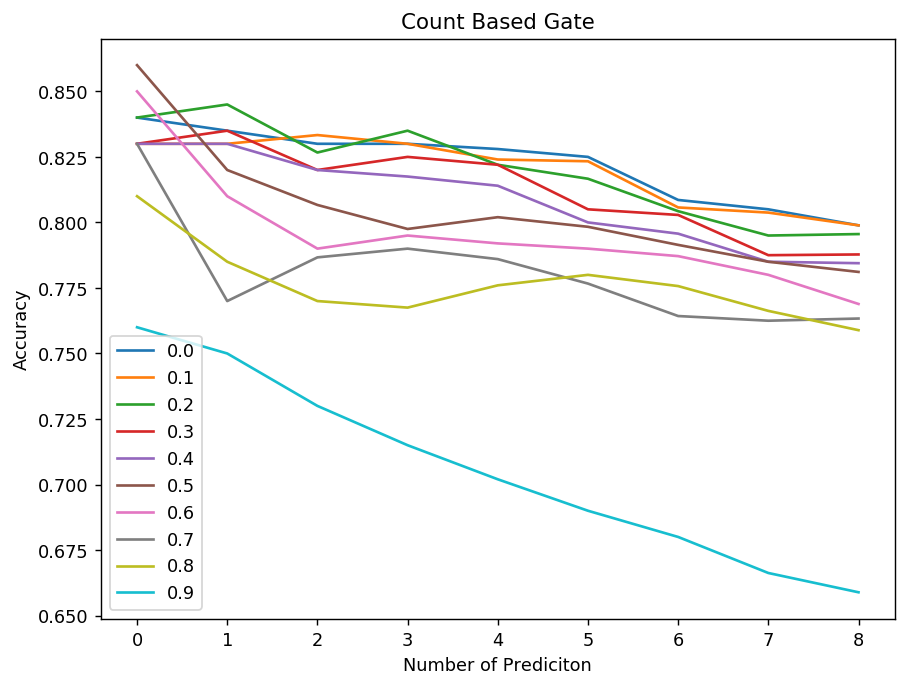

In [28]:
# plt.figure(num=None, figsize=(8, 6), dpi=128, facecolor='w', edgecolor='k')
# for score_list in plt_list:
#     plt.plot(score_list)
# plt.legend(legend_list)
# plt.xlabel("Number of Prediciton")
# plt.ylabel("Accuracy")
# plt.title("Count Based Gate")
# plt.show()

In [ ]:
np.save('count_eval.npy',score_list)

In [ ]:
count = 0
# est = time_est(100)
total_atd = collections.defaultdict()
for i in uni_artist:
    ip = i
    target_cus = dict((k, v) for k, v in artist_data['Linkin Park'].items() if v >= 0).keys()
    artist_temp_dict = collections.defaultdict()
    for i in target_cus:
        for j in cus_data[i].keys():
            try:
                artist_temp_dict[j]+=cus_data[i][j]
            except:
                artist_temp_dict[j] = cus_data[i][j]
    total_atd[i] = artist_temp_dict
    op = list(sorted(artist_temp_dict, key=artist_temp_dict.get, reverse=True))
    op.remove(ip)
    related = op[:10]
    ip_gen = genres[ip]
    for j in related:
        for i in genres[j]:
            if i in ip_gen:
                count+=1
                break
#     est.check()

In [ ]:
count/1000

In [ ]:
len(target_cus)

In [ ]:
%time ip = df['artist'][0]
%time temp_cus = df[df['artist']==ip]
%time temp_cus = temp_cus[temp_cus['rating']>100]['customer_id'].unique()
%time len(temp_cus)

%time target_cus = df[df['customer_id'].isin(temp_cus)]
%time target_cus['artist'].value_counts().head(11)[1:]

#evaluate


%time related = list(target_cus['artist'].value_counts().head(11)[1:].reset_index()['index'])

%time ip_gen = genres[ip]

count = 0
for j in related:
    for i in genres[j]:
        if i in ip_gen:
            count+=1
            break
print(count/10)



In [ ]:
class time_est():
    def __init__(self, total_len):
        self.t_start = time.time()
        self.total_len = total_len
        self.count = 0
        self.t_ref = time.time()
    
    def check(self,no_of_check=1,info=""):
        self.count += no_of_check
        if time.time() - self.t_ref > 1:
            t_used = time.time() - self.t_start
            t_total = t_used * self.total_len / self.count
            t_remain = t_total - t_used
            process_bar = "|"
            for i in range(40):
                if (i/40) < (self.count/self.total_len):
                    process_bar += "█"
                else:
                    process_bar += " "
            process_bar += "|"
            if info != "":
                info = str(info) + "  "
            print("\r" + (str(info) + "{:.2f}% ({}/{})  ".format(self.count * 100/self.total_len, self.count,self.total_len)) 
                  + str(process_bar).ljust(45) 
                  + "Used: {:02.0f}:{:02.0f}:{:02.0f}".format(int(t_used/3600), int(t_used/60)%60, t_used % 60).ljust(16) 
                  + "ETA: {:02.0f}:{:02.0f}:{:02.0f}".format(int(t_remain/3600), int(t_remain/60)%60, t_remain % 60),end="")
            self.t_ref = time.time()
        if self.count == self.total_len:
            t_used = time.time() - self.t_start
            if info != "":
                info = str(info) + "  "
            print("\r" + str(info) + "Finished in " 
                  + "{:02.0f}:{:02.0f}:{:02.0f}".format(int(t_used/3600), int(t_used/60)%60, t_used % 60).ljust(100))
    def get(self,no_of_check=1):
        process_bar = "|"
        for i in range(40):
            if (i/40) < (self.count/self.total_len):
                process_bar += "█"
            else:
                process_bar += " "
        process_bar += "|"
        self.count += no_of_check
        t_used = time.time() - self.t_start
        t_total = t_used * self.total_len / self.count
        t_remain = t_total - t_used
        return "{} ETA: {:02.0f}:{:02.0f}:{:02.0f}".format(process_bar, int(t_remain/3600), int(t_remain/60)%60, t_remain % 60)
        

In [ ]:
genres = np.load('top100artistgenres.npy').item()

In [ ]:
uni_artist = list(df['artist'].unique())

In [ ]:
count = 0
est = time_est(100)
for i in uni_artist:
    ip = i
    temp_cus = df[df['artist']==ip]
    temp_cus = temp_cus[temp_cus['rating']>100]['customer_id'].unique()
    len(temp_cus)

    target_cus = df[df['customer_id'].isin(temp_cus)]
    target_cus['artist'].value_counts().head(11)[1:]

    related = list(target_cus['artist'].value_counts().head(11)[1:].reset_index()['index'])
    ip_gen = genres[ip]
    for j in related:
        for i in genres[j]:
            if i in ip_gen:
                count+=1
                break
    est.check()

In [ ]:
count = 0
est = time_est(100)
for i in uni_artist:
    ip = i
    temp_cus = df[df['artist']==ip]
    temp_cus = temp_cus[temp_cus['rating']>100]['customer_id'].unique()
    len(temp_cus)

    target_cus = df[df['customer_id'].isin(temp_cus)]
    target_cus['artist'].value_counts().head(11)[1:]

    related = list(target_cus['artist'].value_counts().head(11)[1:].reset_index()['index'])
    ip_gen = genres[ip]
    for j in related:
        for i in genres[j]:
            if i in ip_gen:
                count+=1
                break
    est.check()

In [ ]:
print(count/1000)

In [ ]:
count = 0
ip = 'Linkin Park'
temp_cus = df[df['artist']==ip]
temp_cus = temp_cus[temp_cus['rating']>100]['customer_id'].unique()
len(temp_cus)

target_cus = df[df['customer_id'].isin(temp_cus)]
target_cus['artist'].value_counts().head(11)[1:]

related = list(target_cus['artist'].value_counts().head(11)[1:].reset_index()['index'])
ip_gen = genres[ip]
for j in related:
    for i in genres[j]:
        if i in ip_gen:
            count+=1
            break
print(count/10)

In [ ]:
','.join(related)

In [ ]:
len(related)

In [ ]:
related